In [1]:
import cmocean as cmo
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr

In [2]:
sshData = xr.open_dataset('../curtain_SSH_SVB_febTS.nc')
sshData_noSVB = xr.open_dataset('../curtain_SSH_NoSVB_febTS.nc')

In [3]:
sns.set_style('ticks')
sns.set_context('paper')
cmap=cmo.cm.tarn_r

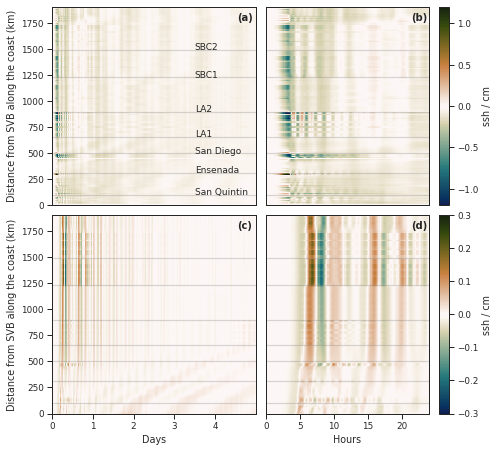

In [4]:
fig = plt.figure(figsize=(7.48,7.48))
gs1 = gridspec.GridSpec(2, 2, wspace=0.05, hspace=0.05)
ax = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[0,1])
ax3 = plt.subplot(gs1[1,0])
ax4 = plt.subplot(gs1[1,1])


# Full run
pc = ax.pcolormesh(sshData.T/(24*3600), 
                   sshData.X,
                   np.transpose((sshData.curtain_data.data)*100),
                   vmin=-1.2, vmax=1.2, cmap=cmap)

pc2 = ax2.pcolormesh(sshData.T/(3600), 
                   sshData.X,
                   np.transpose((sshData.curtain_data.data)*100),
                   vmin=-1.2, vmax=1.2, cmap=cmap)
cb = plt.colorbar(pc2,ax=ax2, label='ssh / cm')
ax2.set_xlim(0,24)

# Bay-No Bay
pc3 = ax3.pcolormesh(sshData.T/(24*3600), 
                   sshData.X,
                   np.transpose((sshData.curtain_data.data-
                                 sshData_noSVB.curtain_data.data)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmap)

pc4 = ax4.pcolormesh(sshData.T/(3600), 
                sshData.X,
                np.transpose((sshData.curtain_data.data-
                              sshData_noSVB.curtain_data.data)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmap)
cb = plt.colorbar(pc4, ax=ax4,label='ssh / cm')
ax4.set_xlim(0,24)

# Reference lines
for km, lab in zip([101,313.7,500, 660, 900, 1231, 1492], ['San Quintin','Ensenada','San Diego','LA1','LA2','SBC1', 'SBC2']):
    ax.axhline(km,color='0.5',alpha=0.3)
    ax.text(3.5,km,lab, fontsize=9)
    ax2.axhline(km,color='0.5',alpha=0.3)
    
    ax3.axhline(km,color='0.5',alpha=0.3)
    ax4.axhline(km,color='0.5',alpha=0.3)

# Labels, etc
ax.set_ylabel('Distance from SVB along the coast (km)')
ax3.set_ylabel('Distance from SVB along the coast (km)')
ax3.set_xlabel('Days')
ax4.set_xlabel('Hours')

ax.set_xticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax4.set_yticks([])

ax.text(0.91,0.93,'(a)',fontweight='bold', fontsize=10, transform=ax.transAxes)
ax2.text(0.89,0.93,'(b)',fontweight='bold', fontsize=10, transform=ax2.transAxes)
ax3.text(0.91,0.93,'(c)',fontweight='bold', fontsize=10, transform=ax3.transAxes)
ax4.text(0.89,0.93,'(d)',fontweight='bold', fontsize=10, transform=ax4.transAxes)

plt.savefig('figure5.png', dpi=500, bbox_inches='tight')
plt.show()